# Working with Complex and Scrace Datasets [Notebook 1]

## Introduction

When it comes to deep learning applications and its development, it is certain that Data is the most essential component of the process. By and of itself, the training data should flow into the networks unobstructed. It should contain meaningful and impactful information for the network/model. Prior to entering the network, the dataset should be prepared by various transformations and such. 

Today, datasets can be obtained from several complex structures or that are stored on heterogenous devices, this inherently also increases the complexity in its handling as well. While this assumes that the data is readily avaible, on the other hand, there cases where the relevant training data (images or annotations) can be unavailable or scarce. 

This project will venture into dealing with these kinds of cases where it also explores the framework that is available with TensorFlow to set up optimised data pipelines (tf.data API).


## Breakdown of this Project:
- Building efficient input pipelines with "tf.data" for extracting and processing data samples of all kinds. (Notebook 1 & 2)
- Augment and render images to help compensate for scarcity of training data. (Notebook 3 & 4)
- Different types of Doamin Adaptation methods and how it helps to train more robust models. (Notebook 5 & 6)
- Create or generate novel images with generative models such as Variational AutoEncoders (VAEs) and Generative Adversarial Networks (GANs). (Notebook 7 & 8)

## Requirements:
1. Vispy
2. Tensorflow 2.++
3. Numpy
4. OS

## Dataset:

The dataset can be obtain from the link: https://www.cityscapes-dataset.com/dataset-overview/.

Quoted from the website: "The Cityscapes Dataset focuses on semantic understanding of urban street scenes." It consists of >5,000 images with fine-grained semantic labels, 20,000 images with coarser annotations that were shot from the view point of driving a car around different cities in Germany.


In [1]:
import os
import tensorflow as tf
import numpy as np

# Run on GPU:
os.environ["CUDA_VISIBLE_DEVICES"]= "0" 

# Set the random set seed number: for reproducibility.
Seed_nb = 42

# Set to run or not run the code block: for code examples only. (0 = run code, and 1 = dont run code)
dont_run = 0

## 1 - TensorFlow Data Pipelines and its Structure: 

__Extract, Transform, Load (ETL)__ is an existing paradigm for data processing in general, where for computer vision tasks, the __ETL Pipelines__ are used to process the raw data into training data before being fed into the models/networks. 

##### The following diagram below demonstrates the overall ETL process for computer vision tasks:

<img src="Description Images/ETL_ComputerVision.png" width="750">

Image Ref -> self-made.

In more detail, each stage can be described as follows:
- For __Extract__: This stage consists of selecting the desired data sources and proceeding to extract its contents. Sources can be varied such as CSV files with filenames for the images, images already in a folder and so on. Note that sources can also be stored on different types of devices like on a local or remote machine/storage device. Part of the extractor's task is to list these sources for each of the originating content/data. 

- For __Transform__: Once the data have been fetched from their respective sources, the next stage would be to transform the data. These transformations can include parsing of the extracted data into a common format for the task. Example: Parsing bytes of images (JPEG or PNG) into a matrix representation (tensors). Additional transformations can also be applied such as cropping/scaling of the images or augmentations with some operations. Similarly these can be performed to the annotations for supervised learning. the final transformation format would usually be tensors (if not only in tensors) after parsing so that it can be compatible with computation of the loss function for model training.

- For __Load__: After the previous stage, the Data would then be "loaded" into the target structure. In terms of machine learning, this would be in batch samples where it is sent to the device that will run the model (like GPUs). After this process, the dataset can be cached or saved.

#### API Information:

Link: https://www.tensorflow.org/guide/data and https://www.tensorflow.org/api_docs/python/tf/data

## 2 - Description of the API Methods:

This section will go through some of the methods that are frequently used for the ETL process.

### 2.1 - Extract: from tensors, text files, TFRecord files and so on.

The __1st Stage__ of the ETL process is Extract the files needed and process them.

#### 2.1.1 - From NumPy and TensorFlow data:

With the dataset source already in the format of either NumPy or TensorFlow, these can be directly passed into "tf.data". The methods that can be used are:
- tf.data.Dataset.from_tensor()
- tf.data.Dataset.from_tensor_slices()

#### 2.1.2 - From Files:

When the files of interest to the task resides within folders, these files can be read by firstly listing them with ".list_files()" which also allows makes an iterable object. The individual files can the be opened with:
- tf.io.read_file()

Additionally, the API also accounts for binary or text files, CSV files, or image/label information in text files (from public datasets). The following can be used to iterate and read them:
- tf.data.TextLineDataset()
- tf.data.experimental.CsvDataset()

#### 2.1.3 - From other Input Sources: (generators, SQL Database, range and so on)

Note that "tf.data.Dataset" is quite the comprehensive API package, where it also account for a range of input sources. Where for example, it can be used to iterate over numbers with:
- .range()

Or work with Python Generators like:
- .from_generator()

Another is data that is sotred in a SQL database, where TensorFlow does have experimental tools to interact with them, such as:
- tf.data.experimental.SqlDataset()


### 2.2 - Transform the Data Samples: with parsing, augmenting and so on.

The __2nd Stage__ of the ETL pipeline is to Transform the files that was extracted from the source. Here, the transformations can be split into two ways:
1. Performing the transformation on the data samples individually.
2. Performing the transformation on the entire dataset as a whole.

The following will describe more on (1).

#### 2.2.1 - Transform by Parsing Images and Labels:

Similarly to the function "tf.io.read_file()" for text files, images can be read and converted to image tensors with:
- tf.io.decode_png()
- tf.io.decode_jpeg()
- tf.io.decode_gif()

To deal with the labels for computer vision tasks, if the labels are images for image segmentation or for editting, the above functions can also be directly applied. When the labels are text files, the following can be used to create an iteratble object:
- TextLineDataset
- FixedLengthRecordDataset

Then to parse the lines or records from the text file, the following can be applied:
- tf.strings
- tf.strings.split(line, sep=',') for CSV files

#### 2.2.2 - Transform by Parsing TFRecord Files:

A more efficient way of inputting the data into the pipeline would be using the "TFRecord" file format, where it will store large number of images together into a binary file and make them directly accessible for read-from-disk operations. This is because the process of iterating through the image files, by the methods mentioned in the above section, inefficient. 

In more detail, TFRecord files are binary files where it will aggregate the data samples such as labels, images, and metadata. It can be serialised with a "tf.train.Example" instance, where it is a dictionaries that names each of the data elements (features). For example:
- {'img'; image1, 'label': label_1, ...}

Each of these element or feature that a sample contains would be an instance of "tf.train.Feature" or of its subclasses. These types of objects will be stored as lists of bytes, floats or integers.
To utilise TFRecord files as part of the input pipelines, the record/data can be passed with:
- tf.data.TFRecordDataset(filename)

More examples can be found in the lin: https://www.tensorflow.org/api_docs/python/tf/data/TFRecordDataset.

#### 2.2.3 - Editing the data samples:

To edit the samples like cropping, resizing or one-hot encoding, the ".map()" function plays a large role in the pipeline. The optional operations suchh as augmentations can be built as a function and be wrap and passed to the ".map()" function and performed on the samples.

### 2.3 - Transform the Datasets: with shuffling, zipping, parllelism and so on.

The tf.data API does provide several functions that can transform one dataset into another whereit adpats the structure or it can be used for merging the data sources.

#### 2.3.1 - Structuring the Dataset:

The API offers operations to perform filtering, shuffling, stacking of the data into batches. The following are a few methods:
- .batch(batch_size, ...), and tf.data.experimental.unbatch() is the opposite operation.
- if .map() is called after .batch(), then the mapping function will have batched data as the input.
- .repeat(count=None) 
- .shuffle(buffer_size, seed, ...), note that the larger the buffer_size the more processing required.
- .filter(predicate), will keep or remove elements based on the Boolean output of the "predicate" function.
- .take(count), returning the first few "count" of the dataset elements.
- .skip(count), returning the dataset without the first "count" of the elements.

More can be found in the API documentation.

#### 2.3.2 - Merging the Dataset:

The two most common techniques to merge datasets together would be:
- .concatenate(dataset), this will concatenate the data samples of the dataset with the current one.
- .zip(datasets), this will combine the dataset's elements into tuples.

Another method (https://www.tensorflow.org/api_docs/python/tf/data/Dataset#interleave) is the:
- .interleave(map_func, cycle_length, block_length, ...)

Where it will apply the "map_func" function to the elements and interleaves the results. For example, if there are several text files and the goal is to combine all of their images into a single dataset, then the interleave function can be applied. Example:

filenames = ['path_to_file1','path_to_file2', ...] \
d = tf.data.Dataset.from_tensor_slices(filesnames) \
d = d.interleave(lambda f: tf.data.TextLineDataset(f).map(some_parse_function), cycle_length=2, block_length=5)

The "cycle_length" is the parameter to fix the number of elements to be processed concurrently.
The "block_length" is the parameter that controls the number of consecutive samples that are returned for every element.


### 2.4 - Loading:

The __3rd and final stage__ of the ETL process is the Loading stage. The advantage here is that "tf.data" operations are registered in TensorFlow operational graph and the data is process to be returned aas Tensor instances. 


## 3 - Demonstrating and preparing Input Pipelines for Tasks:

With the introduction of ETL above, this stage will venture into the step by step process. The example here will be the Cityscapes dataset that was used in the semantic and instance segmentation of the previous project.

### 3.1 - Setting up the Global Variables and Working Directory:

In [2]:
# For PC:
# Run once, then comment it, so it does not execute the code again:
currentDirectory = os.getcwd()
os.environ["CITYSCAPES_DATASET"] = currentDirectory + "/Dataset/cityscapes"

In [3]:
# Import the utility files:
from dataset_utilities import (CITYSCAPES_FOLDER,
                               CITYSCAPES_LABELS,
                               CITYSCAPES_IGNORE_VALUE,
                               cityscapes_input_func,
                               extract_cityscapes_file_pairs,
                               postprocess_to_show_images)

from plotting_utilities import plot_images_inGrid

# Global Variables:
batch_size     = 32
nb_epochs      = 90
image_size     = [256, 256]
nb_channels    = 3
nb_classes     = len(CITYSCAPES_LABELS)
nb_show        = 3

## 3.2 - Extract the Data (Stage 1):

The first step would be to __extract__ the data samples that will later be processed and used as the input to train the model. 

This will mean parsing or listing the files that contains the images and the corresponding labels for both the training and validation data.

In [4]:
# For the Training Data:
train_input_files , train_gt_files = extract_cityscapes_file_pairs(split='train', 
                                                                   type='leftImg8bit_blurred')

# For the Validation Data:
val_input_files, val_gt_files = extract_cityscapes_file_pairs(split='val', 
                                                              type='leftImg8bit_blurred')

# Print out the summary:
print("Cityscapes - Training Dataset : {} images ; {} GTs.".format(len(train_input_files), 
                                                                   len(train_gt_files)))

print("Cityscapes - Validation Dataset : {} images ; {} GTs.".format(len(val_input_files), 
                                                                     len(val_gt_files)))

Cityscapes - Training Dataset : 2975 images ; 2975 GTs.
Cityscapes - Validation Dataset : 500 images ; 500 GTs.


The next part is to instantiate "tf.data.Dataset" objects for the purpose of iterating (pair by pair) over them.

In [5]:
# Here, taking an example of a single sample:
random_img_idx = np.random.choice(a=len(val_input_files))

# Select and grab the image files:
image_files = tf.constant(value=[val_input_files[random_img_idx]])
gt_files = tf.constant(value=[val_gt_files[random_img_idx]])

# Create the dataset from slices of the tensor:
dataset_file = tf.data.Dataset.from_tensor_slices(tensors= {'image': image_files, 
                                                            'label': gt_files})

# An optional setting, where TensorFlow can keep on iterating over the whole dataset:
dataset_file = dataset_file.repeat()

print(dataset_file)

<RepeatDataset shapes: {image: (), label: ()}, types: {image: tf.string, label: tf.string}>


## 3.3 - Transform the Data (Stage 2):

The second stage here would be to perform transformations on the now extracted data. The first consideration is the type of format that is expected in the downstream systems/modules, this will determine how to parse and covert the data samples. 

Here, the files should be parse into image and label tensors with an optional resize.

In [6]:
# Define the Parse Function:
def parse_func(filenames, resize_to=[256, 256]):
    """ This will parse the files into the desired input/label image pair.
    Parameters:
        - filenames, is the Dict containing the two files (filenames['image'], filenames['label'])
        - resize_to, is the (H x W) dimensions to resize the image and label into.
    Returns:
        - returns an Input Tensor, Label Tensor
    """
    # Select the image and label file:
    img_filename, gt_filename = filenames['image'], filenames['label']
    
    # Read the files and return them as bytes:
    image_string, gt_string = tf.io.read_file(filename=img_filename), tf.io.read_file(filename=gt_filename)
    
    # Decode the images:
    image_decoded = tf.io.decode_jpeg(contents=image_string, channels=3)
    gt_decoded = tf.io.decode_jpeg(contents=gt_string, channels=1)
    
    # Convert the Image to Float:
    image = tf.image.convert_image_dtype(image=image_decoded, dtype=tf.float32)
    gt = tf.cast(x=gt_decoded, dtype=tf.int32)
    
    # Resizing the Image and Gt files:
    image = tf.image.resize(images=image, size=resize_to)
    gt = tf.image.resize(images=gt, size=resize_to, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    return image, gt    
    

Now with the paarse function defined, it can be used with the ".map()" function and applied to the dataset. As the parse function was composed of TensorFlow operations, it can be applied to the "tf.data.Dataset" instance by use of the ".map()" function.

In [7]:
# import the required libaries:
from plotting_utilities import plot_images_inGrid
import functools

In [8]:
# Parse the dataset into Images:

# Instantiate the Parse Funcion:
parse_fn = functools.partial(parse_func, resize_to=image_size)

# Apply it:
dataset_image = dataset_file.map(parse_fn)
print(dataset_image)

<MapDataset shapes: ((256, 256, 3), (256, 256, 1)), types: (tf.float32, tf.int32)>


From the output above, it can be seen that the "tf.data" pipeline returs 2 tensors for every iteration. This would be the "input image and its corresponding label map". The next part would be to visualise the transformed data.

### Visualise:

To do this, define a plot function.

In [9]:
def show_dataset_samples(dataset, nb_show=4):
    """ This will plot a specifed number of the image and label files.
    Parameters:
        - dataset, is the dataset to show.
        - nb_show, is the number of images to plot.
    Returns:
        - returns a plot of the images.
    Note:
        - Assume the data was not batched.
    """
    # Assume the data was not batched, repeat by 'nb_show' times to obtain 
    # several augmentted version of the same data sample.
    dataset = dataset.repeat(nb_show)
    
    # Iterate to grab the samples:
    image_show, gt_show = [], []
    for image, gt in dataset:
        image_show.append(image)
        gt_show.append(gt)
        nb_show -= 1
        
        if nb_show == 0:
            break
    
    # Convert, process and display:
    image_show = tf.stack(values=image_show, axis=0)
    gt_show = tf.stack(values=gt_show, axis=0)
    
    image_show, gt_show = postprocess_to_show_images(image=image_show,
                                                     pred=gt_show)
    
    figure = plot_images_inGrid(images = [image_show, gt_show],
                                titles=["images", "ground-truths"])
    figure.show() 
    

D:\anaconda3\envs\Py37Work\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


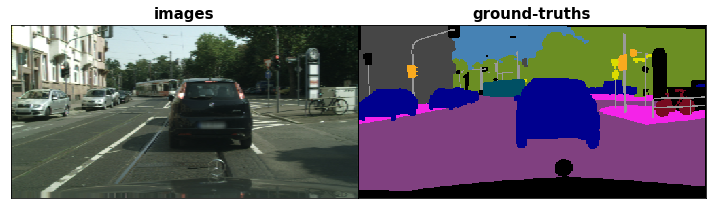

In [10]:
# Show the images from the extracted-transformed dataset:
show_dataset_samples(dataset=dataset_image,
                     nb_show=1)

### 3.3.1 - Augment:

For the purposes of training a more robust model, further transformation may be required to be applied on the dataset such as __Augmentation__. This means that it will apply some transformations to __increase the variability__ of the training data.

In [18]:
# Define an Augmentation Function:
def augmentation_func(image, gt_image, crop_min_factor=None, flip_left_right=True, 
                      flip_up_down=False, brightness_max_delta=0.15, saturation_max_delta=0.5):
    """ This will apply some random transformations to augment the training data/images.
    Parameters:
        - image, is the input image tensor to augment.
        - gt_image, is the ground truth tensor to augmnt.
        - crop_min_factor, is an Optional Flag to apply cropping with a minimum crop factor.
        - flip_left_right, is an Optional Flag to flip the images left or right.
        - flip_up_down, is an Optional Flag to flip the images up or down.
        - brightness_max_delta, is an Optional Flag to set the brightness levels.
        - saturation_max_delta, is an Optional Flag to set the saturation levels.
    Returns:
        - returns the Augment Image and Label Tensors.
    """
    # Note, to apply random flip or resize/cropping to the images, it has to be done to both
    # Label and Images. To do this efficiently, Stack the images and label images together along
    # the same channel axis:
    do_geometrical_transform = crop_min_factor is not None or flip_left_right or flip_up_down
    
    if do_geometrical_transform:
        nb_image_channels = tf.shape(image)[-1]
        nb_gt_channels = tf.shape(gt_image)[-1]
        stacked_images_gts = tf.concat(values=[image, tf.cast(gt_image, dtype=image.dtype)], 
                                     axis=-1)
        
        # Apply Random Flip if true:
        if flip_left_right:
            stacked_images_gts = tf.image.random_flip_left_right(stacked_images_gts)
        
        if flip_up_down:
            stacked_images_gts = tf.image.random_flip_up_down(stacked_images_gts)
        
        # Apply Random Cropping if true:
        if crop_min_factor is not None:
            original_shape = tf.shape(stacked_images_gts)[-3:-1]
            
            random_scale_factor = tf.random.uniform(shape=[],
                                                    minval=crop_min_factor,
                                                    maxval=1.,
                                                    dtype=tf.float32)
            
            crop_shape = tf.cast(x=tf.cast(original_shape, tf.float32) * random_scale_factor, 
                                 dtype=tf.int32)
            
            # For a Single Image: len == 3
            if len(stacked_images_gts.shape) == 3:
                crop_shape = tf.concat(values=[crop_shape, [nb_image_channels + nb_gt_channels]], 
                                       axis=0)
                
            # For Batched images:    
            else:
                batch_size = tf.shape(stacked_images_gts)[0]
                crop_shape = tf.concat(values=[[batch_size], crop_shape, [nb_image_channels + nb_gt_channels]], 
                                       axis=0)
                
            stacked_images_gts = tf.image.random_crop(value=stacked_images_gts,
                                                      size=crop_shape)
            
        # Next part of transformations are different for either input images or gt labels.
        # gt labels will be applied with (nearest-neighbor resizing for the label image VS
        #  interpolated resizing for the image)
        # input images will be applied (colour changes and such...)
        # Therefore, the stacked images + gt labels will be split apart:
        image = stacked_images_gts[..., :nb_image_channels]
        gt_image = tf.cast(x=stacked_images_gts[..., nb_image_channels:], 
                           dtype=gt_image.dtype)
        
        # Resize the image and gt back to the expected dimensions:
        if crop_min_factor is not None:
            image = tf.image.resize(images=image, 
                                    size=original_shape)
            gt_image = tf.image.resize(images=gt_image, 
                                       size=original_shape, 
                                       method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
            
    # Apply Random Brightness and Saturations:
    need_clipping = False
    
    # For brightness:
    if brightness_max_delta is not None:
        image = tf.image.random_brightness(image=image,
                                           max_delta=brightness_max_delta)
        need_clipping = True
    
    # For saturation:
    if saturation_max_delta is not None:
        image = tf.image.random_saturation(image=image,
                                           lower= 1-saturation_max_delta,
                                           upper= 1+saturation_max_delta)
        need_clipping = True
    
    # Due to the random applied brightness and saturation, some of the pixel values may not
    # be scaled properly (0, 1) anymore, so Clipping is needed:
    if need_clipping:
        image = tf.clip_by_value(t=image, clip_value_min=0.0, clip_value_max=1.0)
        
    
    return image, gt_image        


With the augmentation function defined, it can then be applied to the dataset in the input pipeline.

D:\anaconda3\envs\Py37Work\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


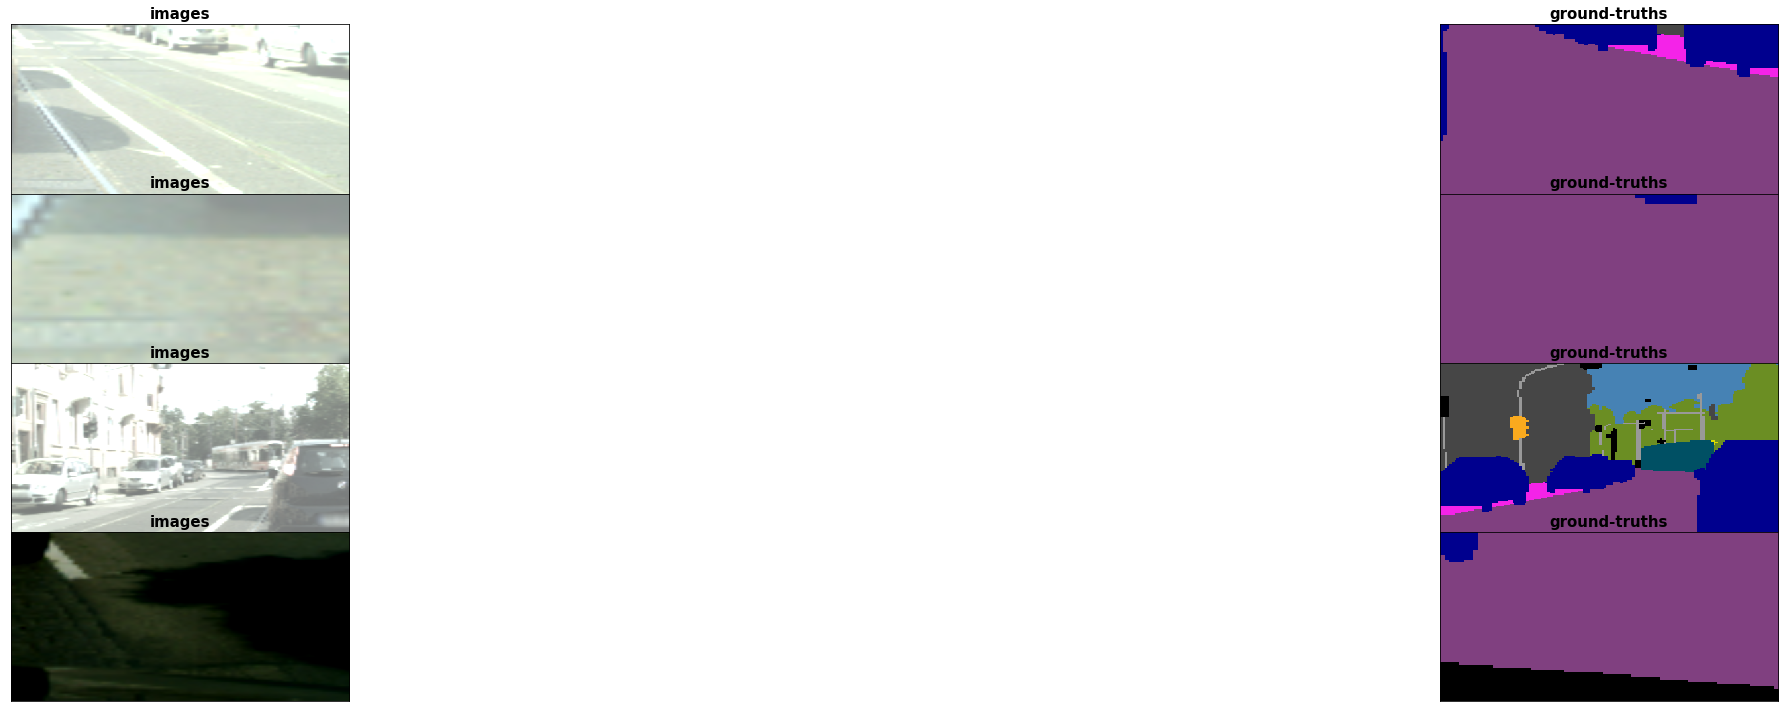

In [19]:
# Augment the Dataset:

# Instantiate the augmentation function:
aug_fn = functools.partial(augmentation_func, 
                           crop_min_factor=0.1, 
                           flip_left_right=True,
                           flip_up_down=True, 
                           brightness_max_delta=0.8, 
                           saturation_max_delta=0.8)

# Apply:
dataset_augmented = dataset_image.map(aug_fn)

# Plot the augmented images:
show_dataset_samples(dataset_augmented, nb_show=4)


The output shows that the augmentation function is working, however, there is a problem. In the case of driver-less cars, the roads/streets in the training set should not be upside down, or that it should not be too zoomed in, or that it should not be artificially too bright and dark. This would not benefit the model during training. 

#### Fix:


D:\anaconda3\envs\Py37Work\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


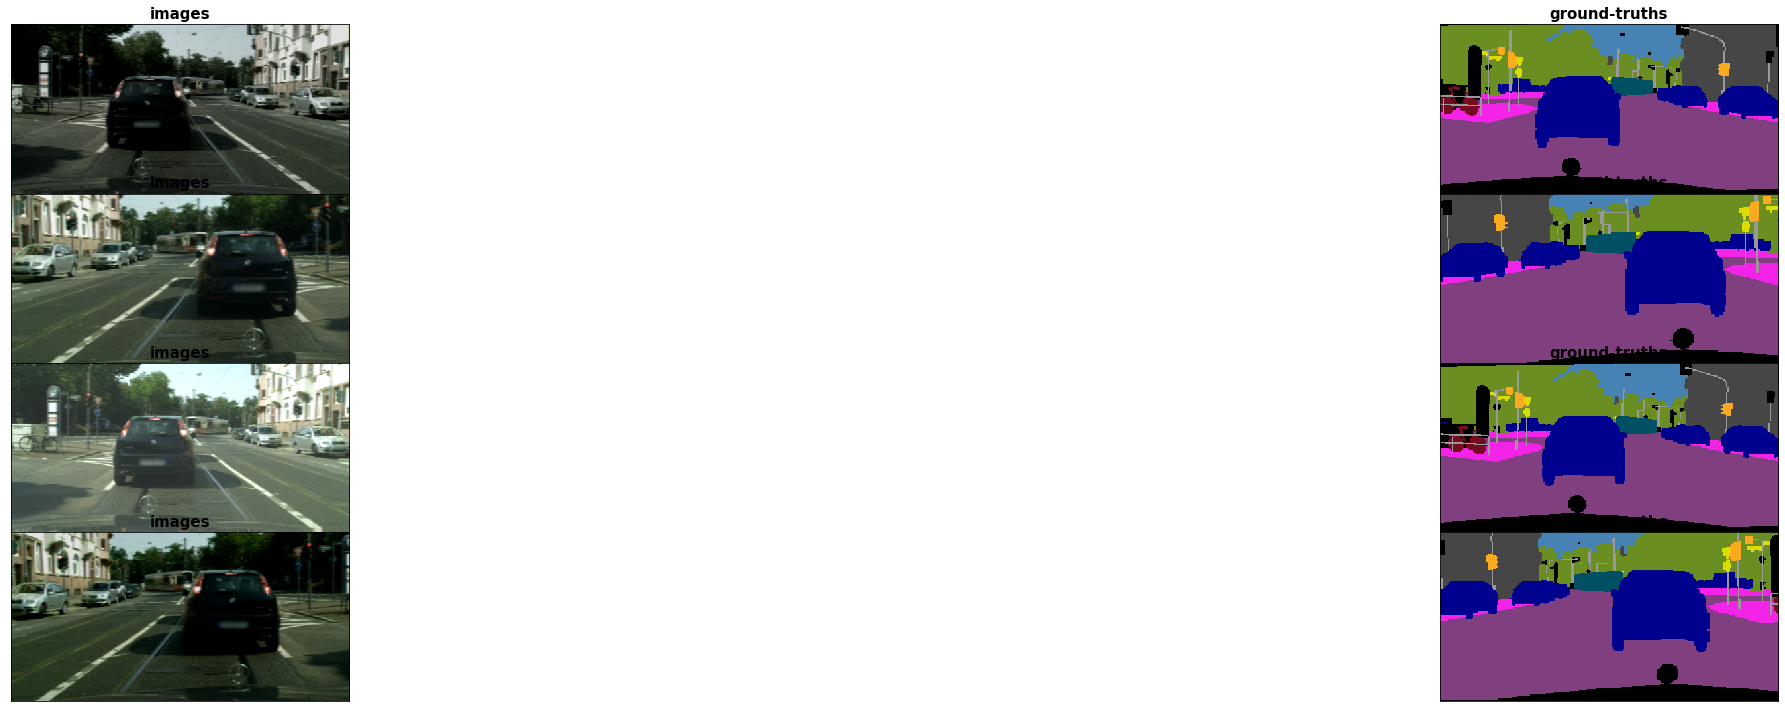

In [20]:
# Augment the Dataset:

# Instantiate the augmentation function:
aug_fn = functools.partial(augmentation_func, 
                           crop_min_factor=0.8, 
                           flip_left_right=True,
                           flip_up_down=False, 
                           brightness_max_delta=0.2, 
                           saturation_max_delta=0.5)

# Apply:
dataset_augmented = dataset_image.map(aug_fn)

# Plot the augmented images:
show_dataset_samples(dataset_augmented, nb_show=4)


The output here is much better as it represents a more realistic driving scenario. This would mean that the model should benefit from this kind of training set.

### 3.4 - Loading the Data:





In [5]:
break

SyntaxError: 'break' outside loop (<ipython-input-5-6aaf1f276005>, line 4)

In [ ]:
<img src="Description Images/.png" width="750">

Image Ref -> 